In [1]:
%matplotlib inline
import pandas as pd


from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
# raw keras
from livelossplot.keras import PlotLossesCallback

# tensorflow.keras
# from livelossplot.tf_keras import PlotLossesCallback

Using TensorFlow backend.


In [2]:
df = pd.read_csv( "./pd_speech_features.csv", skiprows=[0] );

In [3]:
df['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

In [4]:
X = df.drop('class',axis=1).to_numpy()
y = df['class'].to_numpy()

# Dividir os dados em conjuntos de treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
X_train

array([[ 55.     ,   1.     ,   0.83536, ...,  31.7664 ,  37.2141 ,
         92.7991 ],
       [210.     ,   1.     ,   0.80896, ...,   4.7774 ,  16.1514 ,
         35.8469 ],
       [121.     ,   0.     ,   0.55945, ...,   3.3372 ,   3.4477 ,
          4.2563 ],
       ...,
       [103.     ,   0.     ,   0.36923, ...,   3.4262 ,   3.3079 ,
          3.4571 ],
       [134.     ,   1.     ,   0.81783, ...,   2.4903 ,   3.0057 ,
          2.6109 ],
       [194.     ,   0.     ,   0.80979, ...,   5.772  ,   4.6637 ,
          4.37   ]])

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
# data preprocessing
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.

ValueError: cannot reshape array of size 427518 into shape (28,28,1)

In [6]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',  # 'mean_squared_error'
              metrics=['accuracy', 'mean_squared_error'])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
plot_losses = PlotLossesCallback()

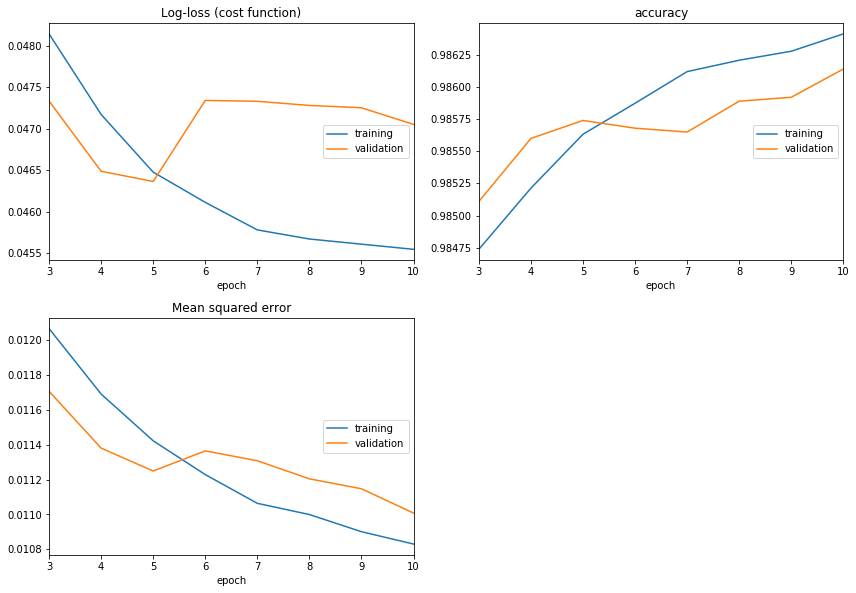

Log-loss (cost function):
training   (min:    0.046, max:    0.072, cur:    0.046)
validation (min:    0.046, max:    0.051, cur:    0.047)

accuracy:
training   (min:    0.976, max:    0.986, cur:    0.986)
validation (min:    0.984, max:    0.986, cur:    0.986)

Mean squared error:
training   (min:    0.011, max:    0.019, cur:    0.011)
validation (min:    0.011, max:    0.013, cur:    0.011)


In [8]:
model.fit(X_train, Y_train,
          epochs=10,
          validation_data=(X_test, Y_test),
          callbacks=[plot_losses],
          verbose=0)